# Isı Denklemi - Dikdörtgen Levhada Sıcaklık Dağılımı

50mm genişliğinde 100mm uzunluğundaki çelik dikdörtgen levha herbir kenarından ısı transferine zorlanmaktadır. Levha, sol ve üst kenardan 1000$^o$C, sağ ve alt kenardan 500$^o$C olacak şekilde sınır sıcaklık değerleri ile beslenmektedir. Başlangıçtaki levha sıcaklığı 30$^o$C olduğuna göre levhanın 10 saniye sonraki sıcaklık dağılımını sonlu farklar yönteminden yararlanarak bulalım.

**Malzeme Özellikleri**


| Özellik | Yoğunluk ($\rho$) | Termal İletkenlik (k) | Özgül Isı (C$_p$) |
| --- | --- | --- | --- |
| Birim | kg/m$^3$ | W/m$^o$C |J/kg$^o$C |
| Değer | 8020 | 16.26 |502|

### Isı Transfer Mekanizması

3 boyutlu ısı denklemi aşağıdaki verilmiştir;

$\frac{\partial}{\partial x}\left(k\frac{\partial T}{\partial x}\right)+
 \frac{\partial}{\partial y}\left(k\frac{\partial T}{\partial y}\right)+
 \frac{\partial}{\partial z}\left(k\frac{\partial T}{\partial z}\right) + q_v = \rho C_p \frac{\partial T}{\partial t}$

Levha boyunca herhangi bir ısı üretimi olmamakla beraber yalnızca 2 boyutlu ısı yayılımı ele alınacaktır. Dolayısıyla z komponenti ve kaynak terimi 0 olacaktır;

$\frac{\partial}{\partial x}\left(k\frac{\partial T}{\partial x}\right)+
 \frac{\partial}{\partial y}\left(k\frac{\partial T}{\partial y}\right)
 = \rho C_p \frac{\partial T}{\partial t}$
 
 Problemi gerçeklemek için yukarıdaki denklem sonlu farklar yöntemi ile ayrıklaştırılabilir;
 
$\frac{\partial T}{\partial t} = \frac{T_{i,j}^{k+1}-T_{i,j}^{k}}{\Delta t}$
 
$\frac{\partial^2 T}{\partial x^2} = \frac{T_{i-1,j}^{k}-2T_{i,j}^{k}+T_{i+1,j}^{k}}{\Delta x^2}$
  
$\frac{\partial^2 T}{\partial y^2} = \frac{T_{i,j-1}^{k}-2T_{i,j}^{k}+T_{i,j+1}^{k}}{\Delta y^2}$

$\alpha = \frac{k}{\rho C_p}$

Denklem yukarıdaki terimler kullanılarak ayrıklaştırılmış şekilde yazıldığında;

$\frac{T_{i,j}^{k+1}-T_{i,j}^{k}}{\Delta t} = \alpha \left[\left(\frac{T_{i-1,j}^{k}-2T_{i,j}^{k}+T_{i+1,j}^{k}}{\Delta x^2} \right)+
\left(\frac{T_{i,j-1}^{k}-2T_{i,j}^{k}+T_{i,j+1}^{k}}{\Delta y^2} \right)
\right] $

Yukarıdaki denklemde $\Delta x $ ve $\Delta y$ oluşturulacak olan ağ yapısındaki(Mesh) herbir hücrenin enini ve boyunu, $\Delta t$ zaman adımını, $\alpha$ ise termal yayılım katsayısını göstermektedir. Denklemi açtığımızda aşağıdaki denklem elde edilir;

$T_{i,j}^{k+1} = \underbrace{\left(1-2 \alpha\Delta t  (\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}) \right)}_{\geq 0} T_{i,j}^{k} +  \alpha \Delta t
\left(\frac{T_{i-1,j}^{k}+T_{i+1,j}^{k}}{\Delta x^2}+\frac{T_{i,j-1}^{k}+T_{i,j+1}^{k}}{\Delta y^2}\right)$

Isının levha boyunca yayılabilmesi için $T_{i,j}^{k}$ teriminin 0 dan büyük olması gerekmektedir. Bu durumda aşağıdaki denklem stabiliteyi sağlamak için sağlanmalıdır;

$\Delta t \leq \frac{1}{2 \alpha \left(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}\right)}$

Bu durumda zaman adımı $\Delta t$, hücresel uzunluklar $\Delta x $ ve $\Delta y$ yukarıdaki stabilite denklemini sağlayacak şekilde belirlenmelidir.


### Geometriyi Tanımlama

In [24]:
X = 0.1   # levhanın uzunluğu
Y = 0.05  # levhanın genişliği
nx = 50   # x eksenindeki hücre sayısı
ny = 25   # y eksenindeki hücre sayısı
dx = X/nx # bir hücrenin uzunluğu
dy = Y/ny # bir hücrenin genişliği

0.002

### Malzeme Özellikleri

In [25]:
k  = 16.26  # Isıl iletkenlik katsayısı (W/mC)
cp = 502    # Özgül ısı katsayısı (J/kgC)
rho = 8020  # Yoğunluk (kg/m3)
alfa = k/(rho*cp) # Isıl yayılım katsayısı

4.038708010849371e-6

### Zaman Aralığı ve Stabilizasyon Durumu

In [26]:
dt = 0.01

0.01

In [27]:
dt <= 1/(2*alfa*(1/dx^2+1/dy^2))

true

Görüldüğü üzere belirlenen $\Delta x$, $\Delta y$ ve $\Delta t$ stabiliziteyi sağlamaktadır.

### Sıcaklık Matrisi ve Sınır Şartları

Sınır şartlarını öncelikle değişken olarak tamamlamak faydalıdır;

In [28]:
T_sol = 1000
T_üst = 1000
T_sağ = 500
T_alt = 500
T_baslangıç = 30


30

Sınır şartlarına uygun sıcaklık matrisi aşağıdaki şekilde oluşturulabilir;

In [29]:
T = Array{Float64}(undef, nx, ny)
T[:,1]  .= T_sol
T[1,:]  .= T_üst
T[:,ny] .= T_sağ
T[nx,:] .= T_alt

for i in 2:nx-1
    for j in 2:ny-1
        T[i, j] = T_baslangıç
    end
end

### Sonlu Farklar Yönteminin Uygulanması

$T_{i,j}^{k+1} = T_{i,j}^{k} + \alpha \Delta t \left[\left(\frac{\overbrace{T_{i-1,j}^{k}-2T_{i,j}^{k}+T_{i+1,j}^{k}}^{T_x}}{\Delta x^2} \right)+
\left(\frac{\overbrace{T_{i,j-1}^{k}-2T_{i,j}^{k}+T_{i,j+1}^{k}}^{T_y}}{\Delta y^2} \right)
\right] $

In [30]:
t = 0
t_son = 10
while t <= t_son
    for i in 2:nx-1
        for j in 2:ny-1
            T_x = T[i+1, j] - 2*T[i, j] + T[i-1, j]
            T_y = T[i, j+1] - 2*T[i, j] + T[i, j-1]
            T[i, j] = T[i, j] + alfa*dt*(T_x/dx^2+T_y/dy^2)
        end
    end
    t+=dt
end


Bu adımdan sonra artık elde ettiğimiz sıcaklık matrisini görselleştirebiliriz;

### Contour Grafiği

Bu bölümde matplotlib kütüphanesinden yararlanılarak elde edilen T matrisi görselleştirilicektir;


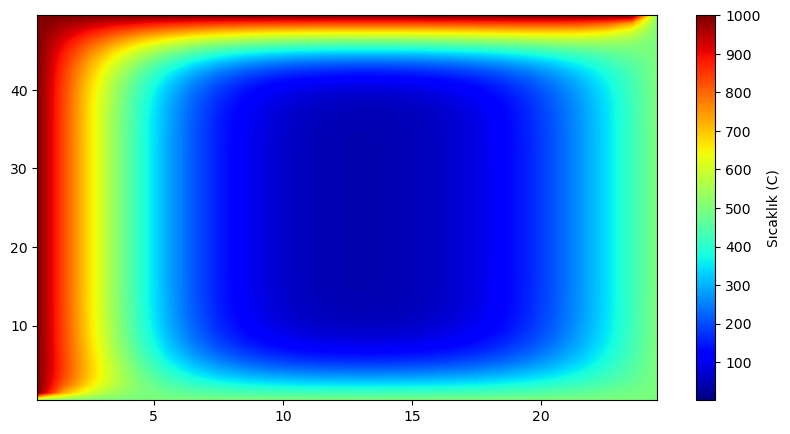

PyObject <matplotlib.colorbar.Colorbar object at 0x00000000516D5BE0>

In [34]:
using PyPlot
plt.figure(figsize=(10,5))
clev = 1:0.5:1000
plt.contourf( T, clev,  cmap=get_cmap("jet"), origin ="upper") 
plt.colorbar(ticks=100:100:T_üst, label="Sıcaklık (C)")



Kullanılan **clev** değişkeni contour grafiğininin çözünürlüğünü arttırmak, colorbar fonksiyonundaki **ticks** değişkeni ise grafiğin sağındaki renk barının üzerindeki seviyeleri belirtmek için tanımlanmıştır.